

# Project: Investigate a Dataset - [TMDb movie data]

(cleaned from original data on Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset is called TMDB movie data. Downloaded from Kaggle website, It contains more than 10000 movies and their rating and basic information, including user ratings and revenue data.

Each movie has some interesting attributes presented in the dataset columns such as:

- Title - English Title of the Movie.
- Original_Title - Title of the Movie in the Original Language.
- Overview - A summary of the Movie.
- Genres - Genres the movie belongs to.
- Cast - The Cast of the Movie.
- Crew - The Crew of the Movie.
- Collection - The Series the movie is part of or related to. If the movie does not belong to any series it is mentioned as "Single".
- Release_Date - The day the Movie was released.
- Release_Status - Is the Movie released.
- Original_Language - The Original Language the Movie was made in.
- Languages_Spoken - Languages Spoken in the Movie.
- Runtime - Total runtime of the movie in minutes.
- Tagline - Tagline of the movie.
- Popularity - Popularity of the Movie.
- Rating_average - Average rating of the Movie.
- Rating_Count - Number of ratings the movie has received.
- Production_Companies - The Companies that made the Movie.
- CountryofOrigin - The country the Movie was made in.
- Budget - Total Budget of the Movie.
- Revenue - Net amount that the Movie grossed for.

### Question(s) for Analysis

**In this presentation, based on this dataset various questions will be answered for the curious minds :**

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Who are the actors with the most appearances in films?
4. Did movies with higher vote count received a better rating?
5. How did the number of film production changed over time?
6. What are the Top Movies based on their revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import operator
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Let's load, check, and clean our Data**


### General Properties


In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Load your data and print out a few lines.
df= pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# more info about data types of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Investigate the shape of dataset
df.shape

(10866, 21)

In [6]:
# check for duplicates in data set, and count them if exists
sum(df.duplicated())

1

In [7]:
#To understand the statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Analysis process

**The dataset contains some columns that aren't useful for my investigation. To simplify the analysis, we will remove these columns:**

1. imdb_id
2. homepage
3. tagline
4. release_date
5. overview
6. keywords



**Upon a deeper look into the dataset, there're movies with some important values such as budget, and revenue set to 0. This is unrealistic and can't be analyized. Thus, any movie with 0 value in one, or more of these columns ("budget_adj", "revenue_adj", "budget", "revenue", "runtime") will be removed.**

**Additionally, columns ("cast", "directors", "genres", "production_companies") have enteries seperated by "|". These could be problematic when trying to extract the different entities within one entery. Thus, the entities in one entery will be seperated into different columns to ease the data exploration process.**


# Data Cleaning

 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id','homepage','tagline','release_date','keywords','overview'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [9]:
#Removing the duplicate entery, and check again
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [10]:
#Replace all the films with 0 values in the specified columns to NaN values, then remove all NaN enteries from the dataset
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)

In [11]:
#Split the colums into seperate ones (split by '|')
#reference: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

cast_df = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast{x+1}"))
dir_df = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director{x+1}"))
gen_df = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre{x+1}"))
prod_df = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_company{x+1}"))

In [12]:
#Updating the dataset
df = df.join([cast_df, gen_df, prod_df, dir_df])
df = df.drop(['cast', 'director', 'genres', 'production_companies'], axis=1)

In [13]:
#Check the new shape of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 38 columns):
id                     3805 non-null int64
popularity             3805 non-null float64
budget                 3805 non-null float64
revenue                3805 non-null float64
original_title         3805 non-null object
runtime                3805 non-null float64
vote_count             3805 non-null int64
vote_average           3805 non-null float64
release_year           3805 non-null int64
budget_adj             3805 non-null float64
revenue_adj            3805 non-null float64
cast1                  3805 non-null object
cast2                  3802 non-null object
cast3                  3802 non-null object
cast4                  3794 non-null object
cast5                  3776 non-null object
genre1                 3805 non-null object
genre2                 3169 non-null object
genre3                 2089 non-null object
genre4                 862 non-null object
genre5   

(3805, 38)

<a id='eda'></a>
## Exploratory Data Analysis




## Research Question 1 (Which genres are most popular from year to year?)

In [14]:
#Determine most popular genres each year
#create a dataframe containing all generes columns
gen_year_df = df.loc[:, 'genre1': 'genre5']
#add the release_date to the dataframe
gen_year_df = gen_year_df.join(df['release_year'])
#identify the unique release years
years = gen_year_df['release_year'].unique()
#empty typles list to carry the popular genre for every year
pop_gen = []
for year in years:
    #create a new df with only films where their release year is equal to the iterating year 
    year_df = gen_year_df[gen_year_df['release_year']==year]
    #remove column release_year
    year_df = year_df.drop(['release_year'], axis = 1)
    #find the most recurring genre entry
    most_pop = year_df.stack().value_counts().idxmax() 
    
    pop_gen.append((year, most_pop))
    
#Create a dataframe to show the sorted "year - popular genre" tuples
pop_df = pd.DataFrame(pop_gen, columns=['Year','Most popular genre']).sort_values('Year').reset_index().drop(['index'], axis=1)
pop_df

,Year,Most popular genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,History
4,1964,Drama
5,1965,Drama
6,1966,Drama
7,1967,Drama
8,1968,Drama
9,1969,Drama


**'Drama' seems to be the most popular genre throughout the years.**



### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [15]:
#Define movies with high revenues as : movies with revenue higher than the mean of revenues and higher than its own budget 
rev_df = df
rev_df['revenue_adj'].mean()


138715934.3461038

In [16]:
rev_df = df.query('revenue_adj >= 138715934.34610373' and 'revenue_adj >=budget_adj')

In [17]:
#For the high revenue films
#Find the most frequent director
director = rev_df.loc[:, 'director1': 'director5']
pop_dir = director.stack().value_counts().idxmax()

#find the most frequent cast member
cast = rev_df.loc[:, 'cast1': 'cast5']
pop_cast = cast.stack().value_counts().idxmax()

#find the most frequent genre
gen = rev_df.loc[:, 'genre1': 'genre5']
pop_gen = gen.stack().value_counts().idxmax()

#find the most frequent production company
prod = rev_df.loc[:, 'production_company1': 'production_company5']
pop_prod = prod.stack().value_counts().idxmax()

#find the most frequent release year
release_year = rev_df['release_year'].value_counts().idxmax()

#find the avg budget
avg_budget = rev_df['budget_adj'].mean()

#find the avg vote
avg_vote = rev_df['vote_average'].mean()

#find the avg revenue
avg_rev = rev_df['revenue_adj'].mean()

In [18]:
properties = {'Popular director' : pop_dir, 
              'Popular cast' : pop_cast,
              'Popular genre' : pop_gen,
              'Production company' : pop_prod,
              'Release year' : release_year,
              'Average budget' : avg_budget,
              'Average Revenue' : avg_rev,
              'Average vote' : avg_vote}
properties

{'Popular director': 'Steven Spielberg',
 'Popular cast': 'Robert De Niro',
 'Popular genre': 'Drama',
 'Production company': 'Universal Pictures',
 'Release year': 2011,
 'Average budget': 47896613.69515944,
 'Average Revenue': 184138832.8676758,
 'Average vote': 6.293729612178326}

**These are the results form the analysis**

### Research Question 3  (Who are the actors with the most appearances in films?)

In [19]:
mp_actors = cast.stack().value_counts()

mp_actors

Robert De Niro       38
Tom Hanks            33
Bruce Willis         33
Tom Cruise           31
Samuel L. Jackson    30
                     ..
Mike Birbiglia        1
Jim Breuer            1
David Banner          1
Dalia HernÃ¡ndez      1
Chris Bauer           1
Length: 5461, dtype: int64

**It is clear from the figure above that the top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.**

## Research Question 4  (Did movies with higher vote count received a better rating?)

Text(0,0.5,'Vote Average')

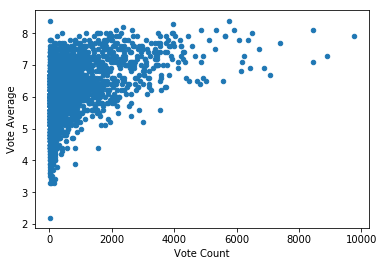

In [20]:
df_vote = df.loc[:, 'vote_count' : 'vote_average']

df_vote.plot(x='vote_count', y='vote_average', kind='scatter')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')

**It's hard to deduce a relationship from this graph, we can check the correlation value**

In [21]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.389853
vote_average,0.389853,1.000000


**The corrolation is 0.39 which is a "moderate to low" correlation. It seems like vote count doesn't hold a strong effect on the vote average.**



## Research Question 5  (How did the number of film production changed over time?)

In [22]:
years = df['release_year'].unique()
prod = []
for year in years:
    year_df = df[df['release_year']==year] 
    count = len(year_df.index) 
    
    prod.append((year, count))
    
prod_df = pd.DataFrame(prod, columns=['Year','Number of movies']).sort_values('Year').reset_index().drop(['index'], axis=1)
prod_df

,Year,Number of movies
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7
5,1965,5
6,1966,5
7,1967,13
8,1968,9
9,1969,4


Text(0,0.5,'Number of movies produced')

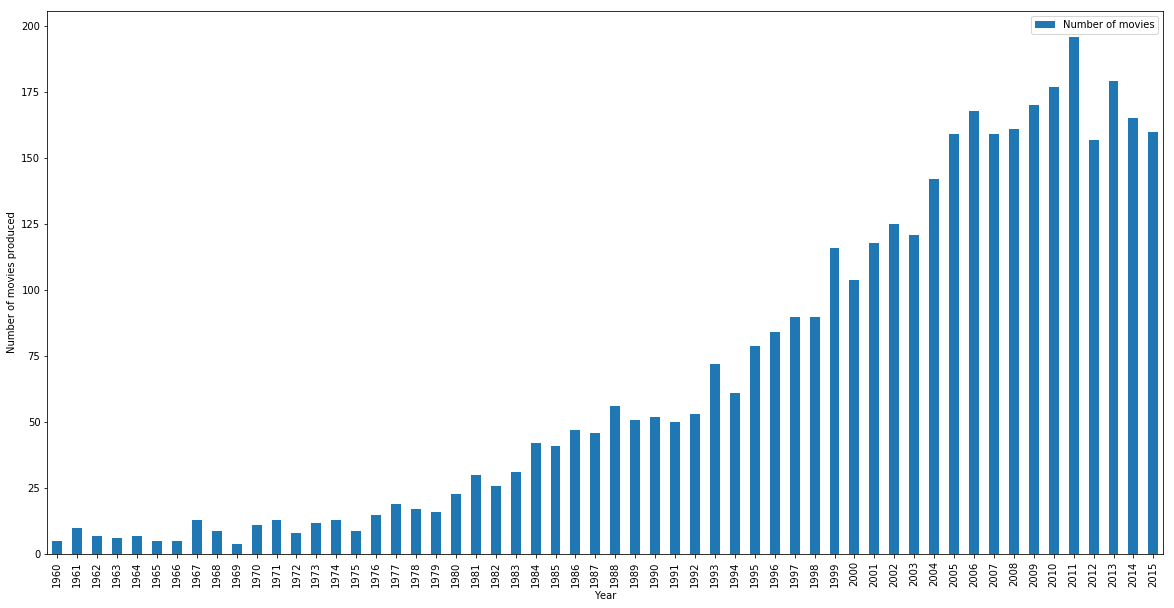

In [23]:
prod_df.plot(x='Year', y='Number of movies', kind='bar', figsize=(20,10))
plt.xlabel('Year')
plt.ylabel('Number of movies produced')

**There's a constant increase with the number of movies produced annually. This makes sense, the industry is expected to grow as more people now can access movies easier than older years.**

## Research Question 6  (What are the Top Movies based on their revenue?)

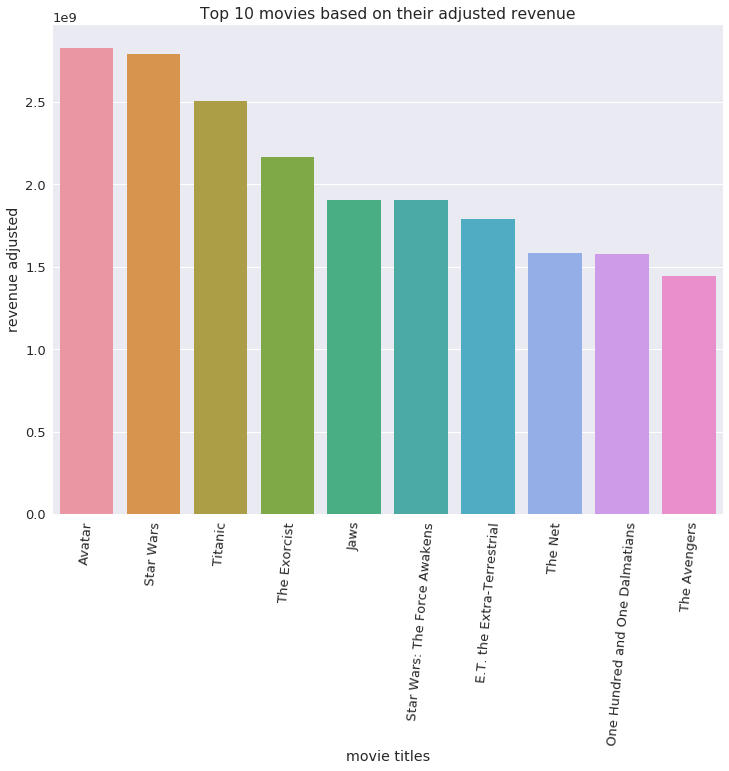

In [24]:

#Top Movies based on their revenue

revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = df[["original_title", "revenue_adj"]]
movies_and_budget = df[['original_title','budget_adj']]
movies_and_popularity = df[['original_title','popularity']]
movies_and_votes= df[['original_title','vote_average']]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

snb.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = snb.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

**According to the table above, the top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.**

<a id='conclusions'></a>
## Conclusions

**Now we could answer the questions:**

    1. Which genres are most popular from year to year?
    - 'Drama' is the most popular genre. 
    
    2. What kinds of properties are associated with movies that have high revenues?
    - We answer this question in details.
    
    3. Who are the actors with the most appearances in films?
    - Top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.
    
    4. Did movies with higher vote count received a better rating?
    - Not quite true. The corralation doesn't indicate a strong relationship between vote counts and higher vote averag
    
    5. How did the number of film production changed over time?
    - There's a significant increase in the number of movies produced each year.
    
    6. What are the Top Movies based on their revenue?
    - The top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.


### Limitations
> **This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values.**:

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0